In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import os
import sys

In [11]:
## Data Ingestion step
df = pd.read_csv(os.path.join('data/gemstone.csv'))

In [10]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [12]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [13]:
### No missing values present in the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [15]:
df.drop('id', axis=1, inplace=True)

In [16]:
### ID was droped id is a unique value 

In [17]:
### check for duplicated records
df.duplicated().sum()

0

In [18]:
### No duplicated value present in dataset

In [22]:
### Separate numerical and categorical columns

num_col = df.columns[df.dtypes != "object"]
cat_col = df.columns[df.dtypes == "object"]

In [23]:
df[cat_col].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [24]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [25]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [26]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [27]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [28]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [29]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

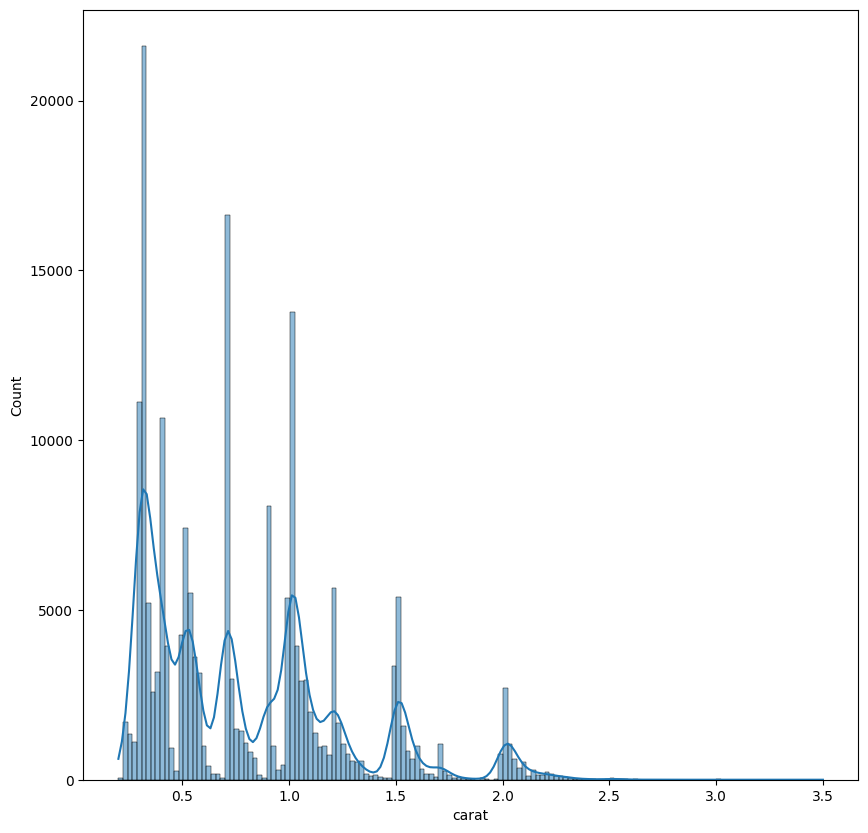

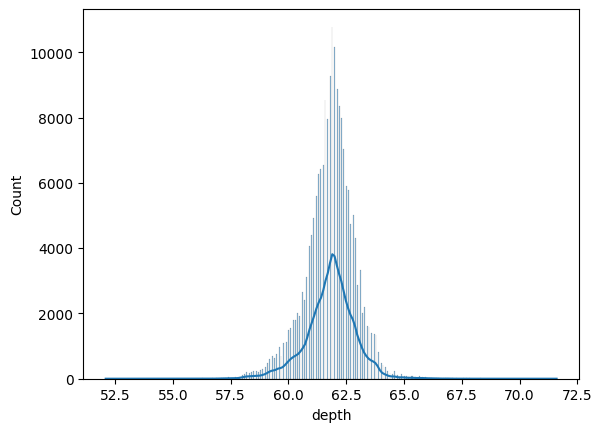

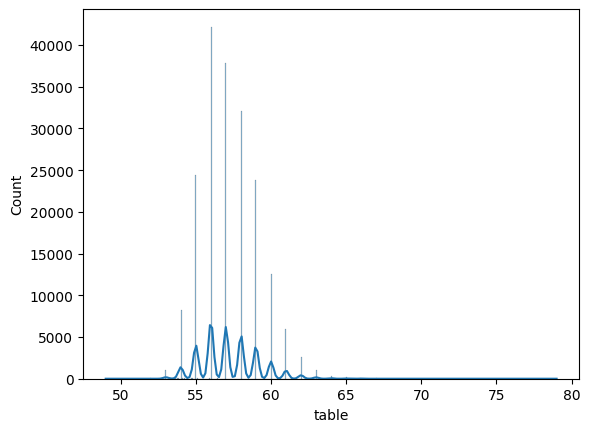

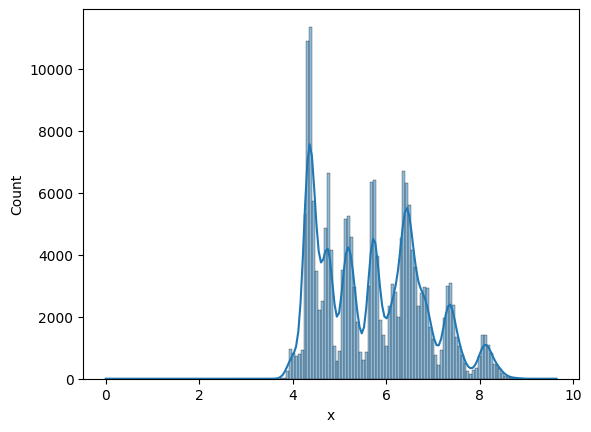

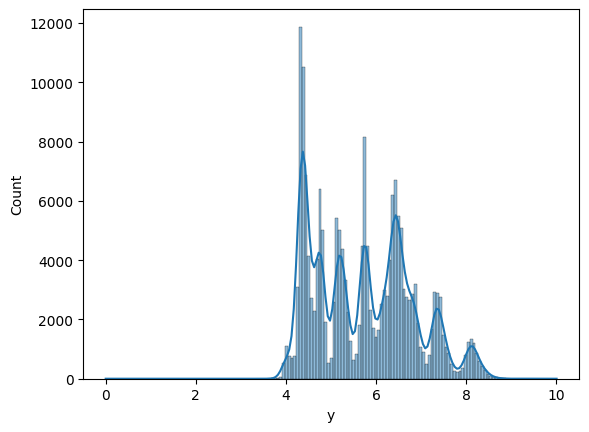

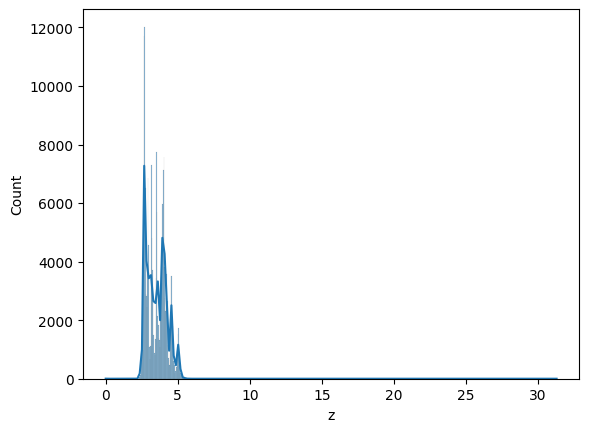

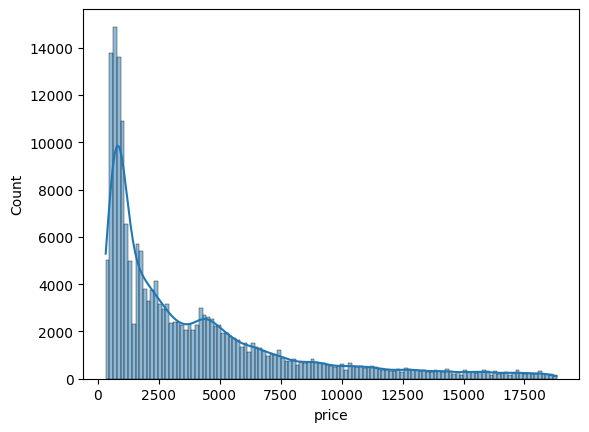

In [32]:
plt.figure(figsize=(10,10))
x=1
for i in num_col:
    sns.histplot(data=df,  x=i, kde=True)
    print("\n")
    plt.show()

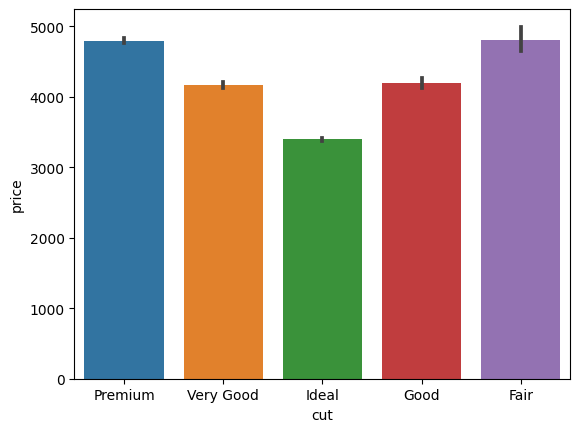

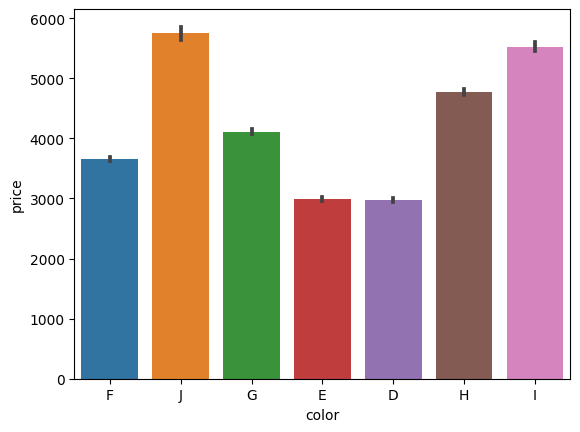

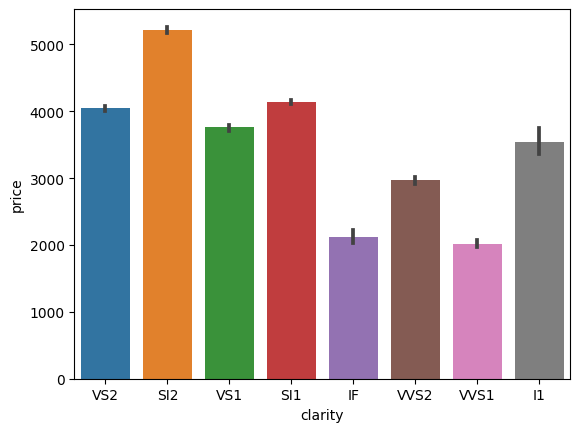

In [49]:
### Categorical data visilization
for i in cat_col:
    sns.barplot(x=i, y='price', data=df)
    plt.show()

In [52]:
cat_data = df[cat_col]

<Axes: xlabel='cut'>

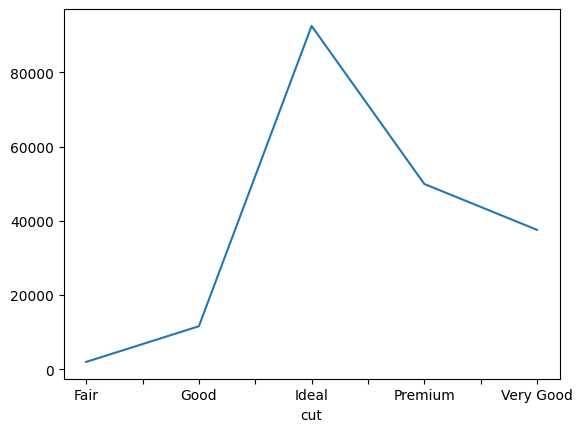

In [56]:
df.groupby('cut')['price'].count().plot()

<Axes: xlabel='color'>

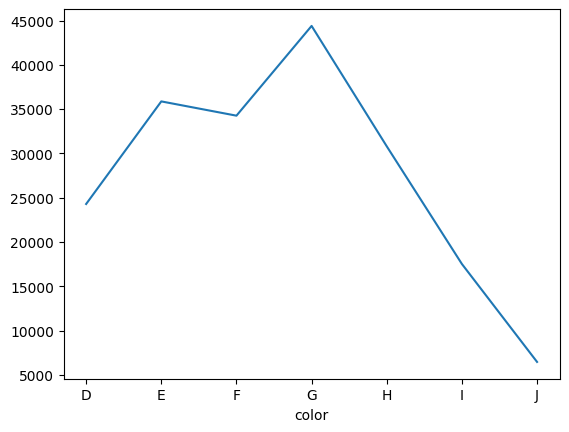

In [58]:
df.groupby('color')['price'].count().plot()

<Axes: xlabel='clarity'>

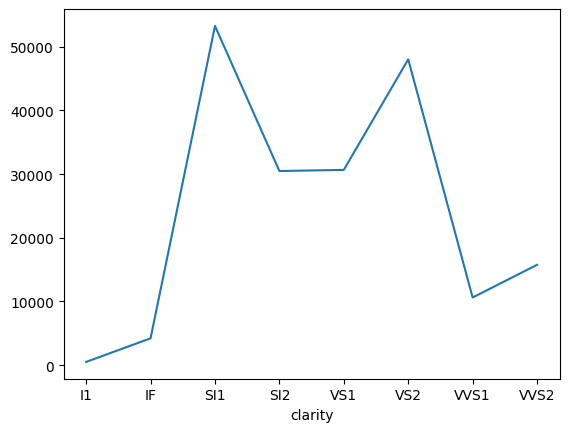

In [60]:
df.groupby('clarity')['price'].count().plot()

<Axes: >

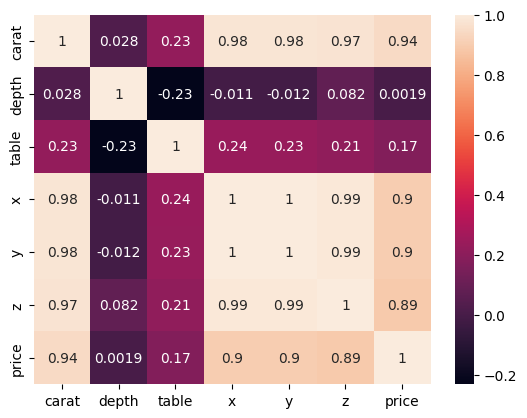

In [62]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [63]:
## We saw the x, y ,x highly co-related to carat thats why we removed the x,y and z
df.drop(labels=['x', 'y', 'z'], axis=1, inplace=True)

/home/faruk/Work-Folder/ML/First-Project/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


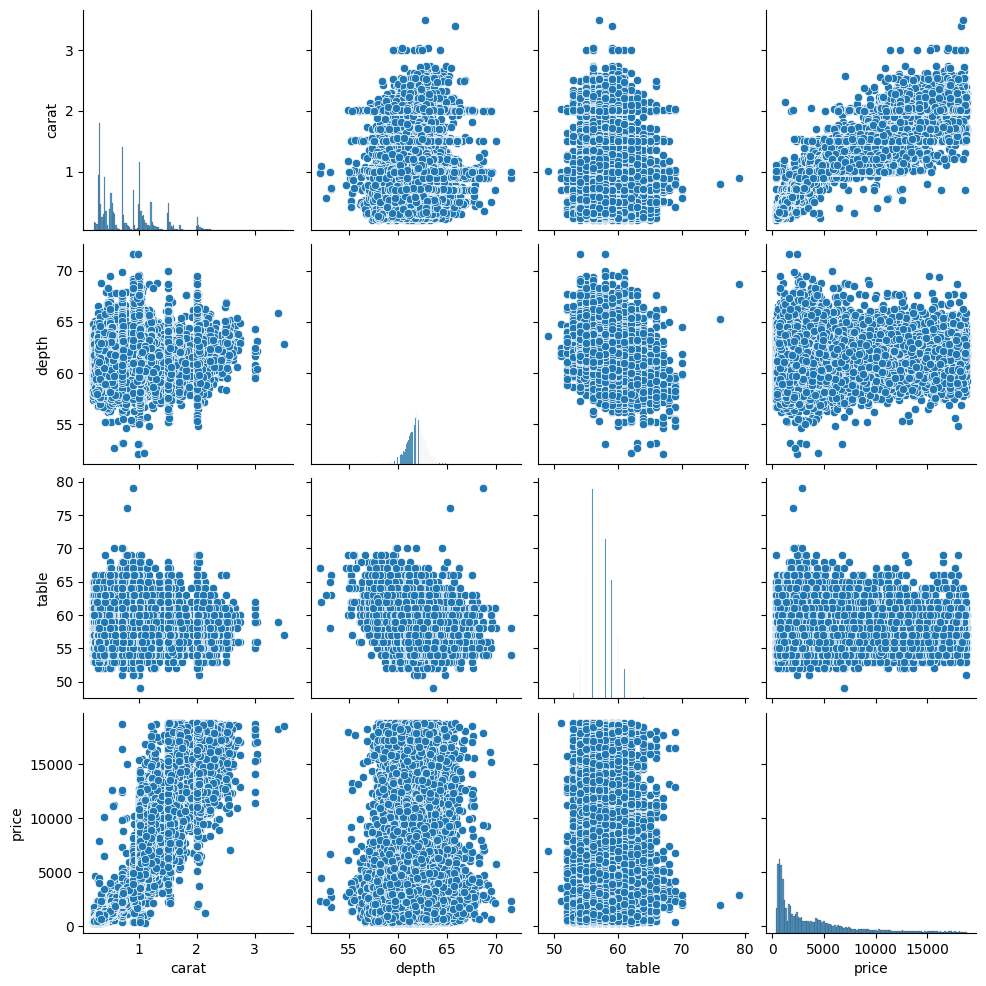

In [65]:
sns.pairplot(df)

In [68]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [69]:
## Accroding to chatgt we make the rank 
cut_ranking = {
    'Premium': 5,
    'Very Good': 4,
    'Ideal': 3,
    'Good': 2,
    'Fair': 1
}

In [70]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [72]:
clarity_ranking = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
}

In [73]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [74]:
color_ranking = {
    'D': 1,
    'E': 2,
    'F': 3,
    'G': 4,
    'H': 5,
    'I': 6,
    'J': 7
}

In [78]:
df['cut'] = df['cut'].map(cut_ranking)
df['color'] = df['color'].map(color_ranking)
df['clarity'] = df['clarity'].map(clarity_ranking)


In [79]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,1,3,4,62.2,58.0,13619
1,2.03,2,7,2,62.0,58.0,13387
2,0.70,3,4,5,61.2,57.0,2772
3,0.32,3,4,5,61.6,56.0,666
4,1.70,1,4,4,62.6,59.0,14453


<Axes: >

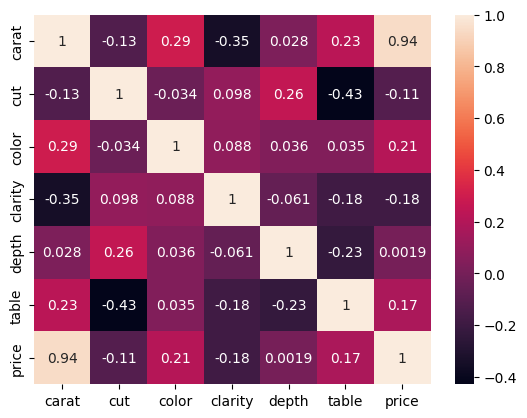

In [80]:
sns.heatmap(df.corr(), annot=True)

In [81]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,1,3,4,62.2,58.0,13619
1,2.03,2,7,2,62.0,58.0,13387
2,0.70,3,4,5,61.2,57.0,2772
3,0.32,3,4,5,61.6,56.0,666
4,1.70,1,4,4,62.6,59.0,14453


## Model Traning